In [2]:
import pandas as pd
news = pd.read_csv('data/OnlineNewsPopularity.csv')

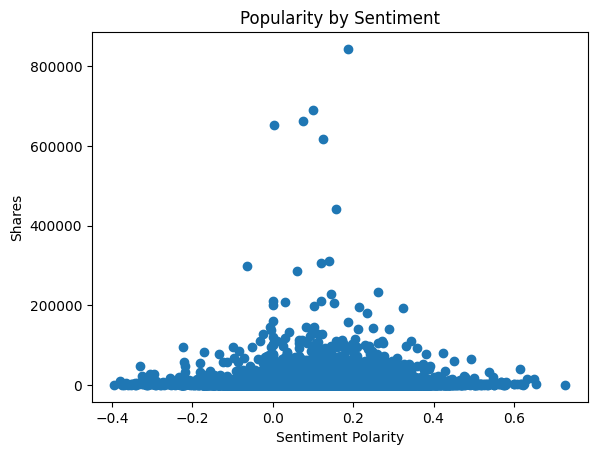

In [3]:
from matplotlib import pyplot as plt
plt.scatter(news[' global_sentiment_polarity'], news[' shares'])
plt.title('Popularity by Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Shares')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
x = news[' global_sentiment_polarity'].values.reshape(-1, 1)
y = news[' shares'].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(x, y)
print(regressor.coef_)
print(regressor.intercept_)

[[499.34840588]]
[3335.80329021]


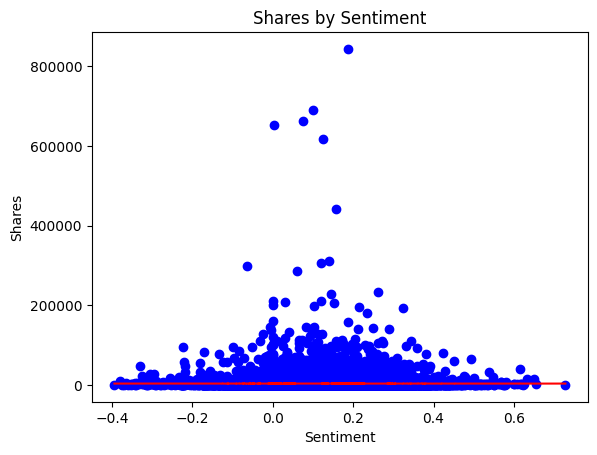

In [5]:
reg_line = regressor.predict(x)
plt.scatter(news[' global_sentiment_polarity'], news[' shares'], color="blue")
plt.plot(sorted(news[' global_sentiment_polarity'].tolist()), reg_line, 'r')
plt.title('Shares by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Shares')
plt.show()

In [6]:
k = 15
news_sentiment = 0.5

In [7]:
all_sentiment = news[' global_sentiment_polarity'].tolist()
all_shares = news[' shares'].tolist()

In [8]:
distance = [abs(x-news_sentiment) for x in all_sentiment]

In [9]:
import numpy as np
idx = np.argsort(distance)
print(idx[0:k])

[30230 22546  7284 13035 29598 19361 36029 30670 25556  6744 26473  7211
  9200 15198 31496]


In [10]:
nearby_shares = [all_shares[i] for i in idx[0:k]]
print(np.mean(nearby_shares))

7344.466666666666


In [11]:
from sklearn.neighbors import KNeighborsRegressor
x = np.array(all_sentiment).reshape(-1, 1)
y = np.array(all_shares)
knn_regressor = KNeighborsRegressor(n_neighbors=15)
knn_regressor.fit(x, y)
print(knn_regressor.predict(np.array([news_sentiment]).reshape(-1, 1)))

[7344.46666667]


In [12]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(np.array(all_sentiment).reshape(-1,1), np.array(all_shares))
print(regressor.predict(np.array([news_sentiment]).reshape(1,-1)))

#knn
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(np.array(all_sentiment).reshape(-1,1), np.array(all_shares))
print(knnregressor.predict(np.array([news_sentiment]).reshape(1,-1)))

#decision tree
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(max_depth=3)
dtregressor.fit(np.array(all_sentiment).reshape(-1,1), np.array(all_shares))
print(dtregressor.predict(np.array([news_sentiment]).reshape(1,-1)))

#random forest
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()
rfregressor.fit(np.array(all_sentiment).reshape(-1,1), np.array(all_shares))
print(rfregressor.predict(np.array([news_sentiment]).reshape(1,-1)))

#neural network
from sklearn.neural_network import MLPRegressor
nnregressor = MLPRegressor()
nnregressor.fit(np.array(all_sentiment).reshape(-1,1), np.array(all_shares))
print(nnregressor.predict(np.array([news_sentiment]).reshape(1,-1)))

[3585.47749315]
[7344.46666667]
[3978.70776621]
[5273.51576732]
[3978.26282834]


/Users/drewlitman/Code/dive_into_data_science/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


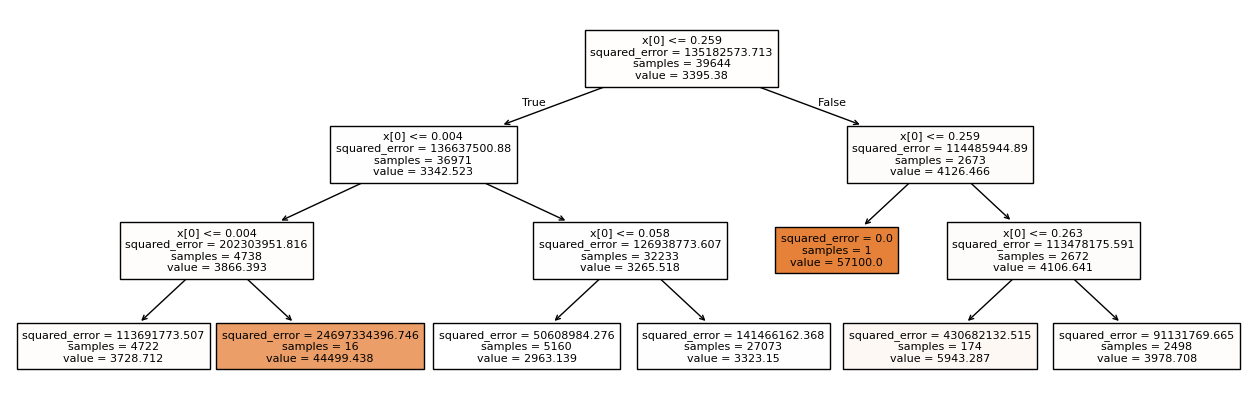

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 5))
plot_tree(dtregressor, filled=True, fontsize=8)
plt.show()

In [14]:
all_prediction = regressor.predict(np.array([all_sentiment]).reshape(-1,1))
prediction_error = abs(all_prediction - all_sentiment)
print(np.mean(prediction_error))

3395.26087436506


In [17]:
from sklearn.model_selection import train_test_split
x = np.array([all_sentiment]).reshape(-1,1)
y = np.array(all_shares)
training_x, testing_x, training_y, testing_y = train_test_split(x, y, random_state=1)

In [18]:
print(len(training_x))
print(len(training_y))
print(len(testing_x))
print(len(testing_y))

29733
29733
9911
9911


In [19]:
rfregressor = RandomForestRegressor(random_state=1)
rfregressor.fit(training_x, training_y)
predicted = rfregressor.predict(testing_x)
prediction_error = abs(predicted-testing_y)

In [20]:
print(np.mean(prediction_error))

3813.8570912000264


In [21]:
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(training_x, training_y)
predicted = knnregressor.predict(testing_x)
prediction_error = abs(predicted-testing_y)
print(np.mean(prediction_error))

3610.3084048027445


In [22]:
x=news[[' global_sentiment_polarity',' n_unique_tokens',' n_non_stop_words']]
y=np.array(all_shares)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)

from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(random_state=1)
rfregressor.fit(trainingx, trainingy)
predicted = rfregressor.predict(testx)
predictionerror = abs(predicted-testy)
print(np.mean(predictionerror))

3474.231759738627


In [23]:
the_median = np.median(news[' shares'])
news["above_median"] = 1*(news[" shares"] > the_median)

In [24]:
x = news[[' global_sentiment_polarity',' n_unique_tokens',' n_non_stop_words']]
y = np.array(news["above_median"])

from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=15)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)
knn_classifier.fit(trainingx, trainingy)
predicted = knn_classifier.predict(testx)

In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(testy,predicted))
# [[true positives, false positives]
# [false negatives, true negatives]]

[[2833 2150]
 [2539 2389]]


In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(testy,predicted)
recall = recall_score(testy,predicted)

print(precision)
print(recall)

0.5263273848865389
0.48478084415584416
